In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)

data[['MaritalDesc', 'Sex', 'Salary']].groupby(['MaritalDesc', 'Sex']).agg(min_salary = ('Salary','min'),median_salary = ('Salary','median'), max_salary = ('Salary','max'), average_salary = ('Salary','mean')).\
    sort_values(by='MaritalDesc', ascending = True)

min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here
y = data.groupby('TermReason').agg(Total_Termination=('Employee_Name', 'count')).sort_values('Total_Termination', ascending = False)
y.head()

,Total_Termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here

filter = data[data['PerformanceScore']=='Exceeds']
y = filter.groupby('RecruitmentSource').agg(total_recruit=('RecruitmentSource','count')).sort_values('total_recruit', ascending=False)
y

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here

results = data.groupby('Department').agg(Manager_Name=('ManagerName','nunique')).sort_values('Department', ascending = True)
results

,Manager_Name
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here

raw = data.groupby('Sex')
raw['Termd'].value_counts(normalize = True)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

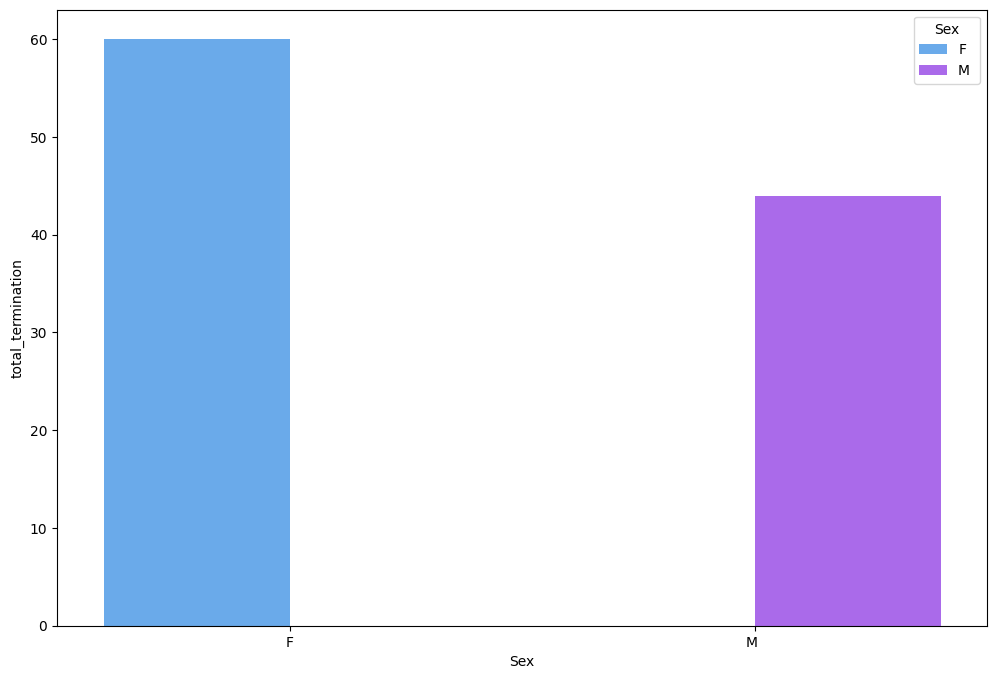

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

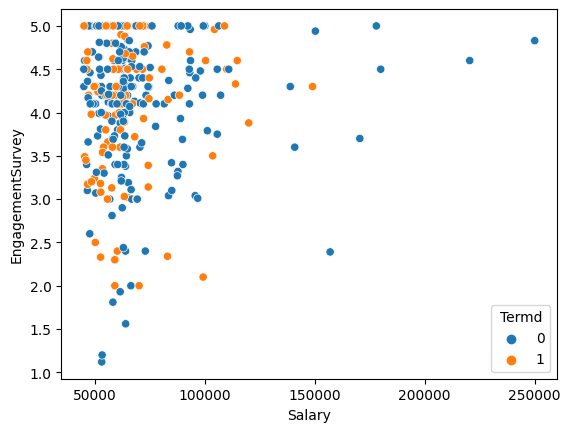

In [ ]:
#code here

sns.scatterplot(data=data, x = 'Salary', y = 'EngagementSurvey', hue = 'Termd')
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

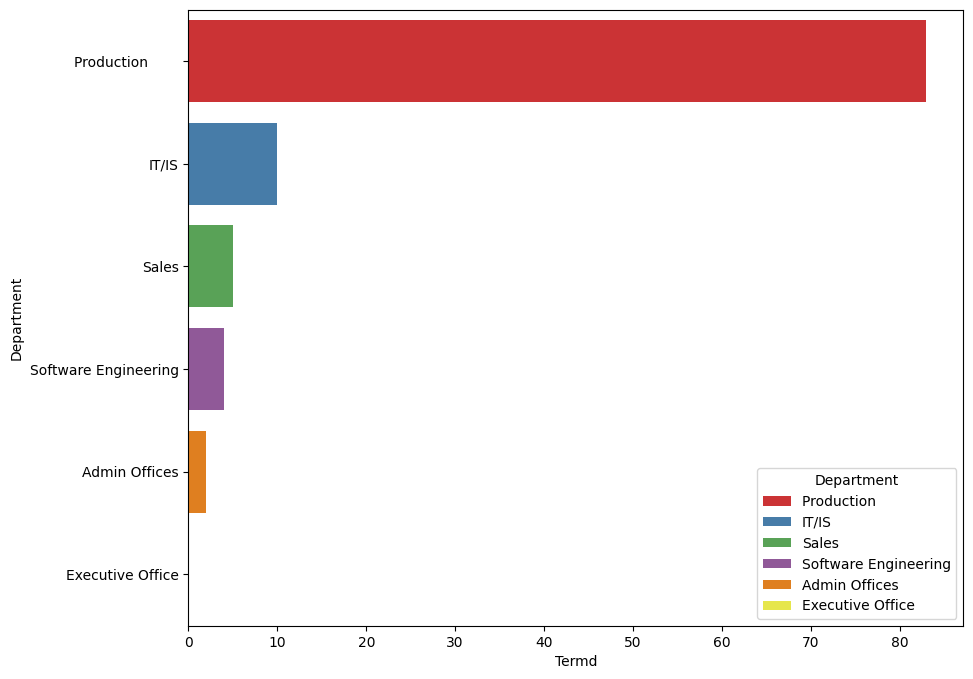

In [ ]:
term = data.groupby(by=['Department']).agg({'Termd':'sum'}).sort_values('Termd', ascending = False).reset_index()

f, ax = plt.subplots(1, 1, figsize = (10, 8))
ax = sns.barplot(x= 'Termd', y = 'Department', hue = 'Department', data=term, palette='Set1', dodge = False)

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

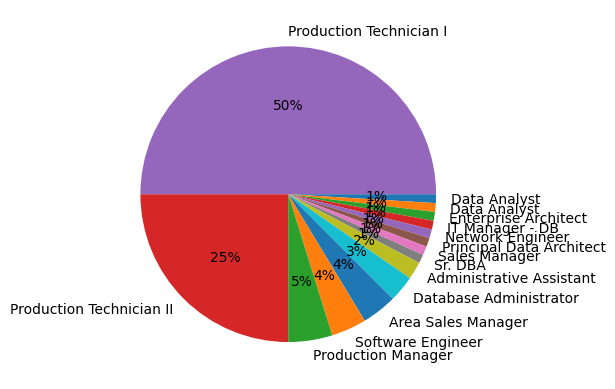

In [ ]:
rawdata = data.loc[(data.Termd == 1)]
filterdata = rawdata.groupby('Position').count().\
sort_values(by='Termd', ascending = True).reset_index()

plt.pie(filterdata['Termd'],labels=filterdata['Position'],autopct='%1.0f%%', counterclock=False)
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

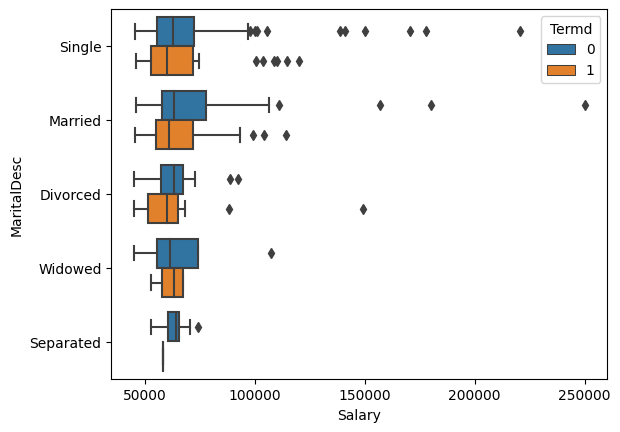

In [ ]:
#code here
import seaborn as sns

sns.boxplot(data=data, x = 'Salary', y = 'MaritalDesc', hue = 'Termd')
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


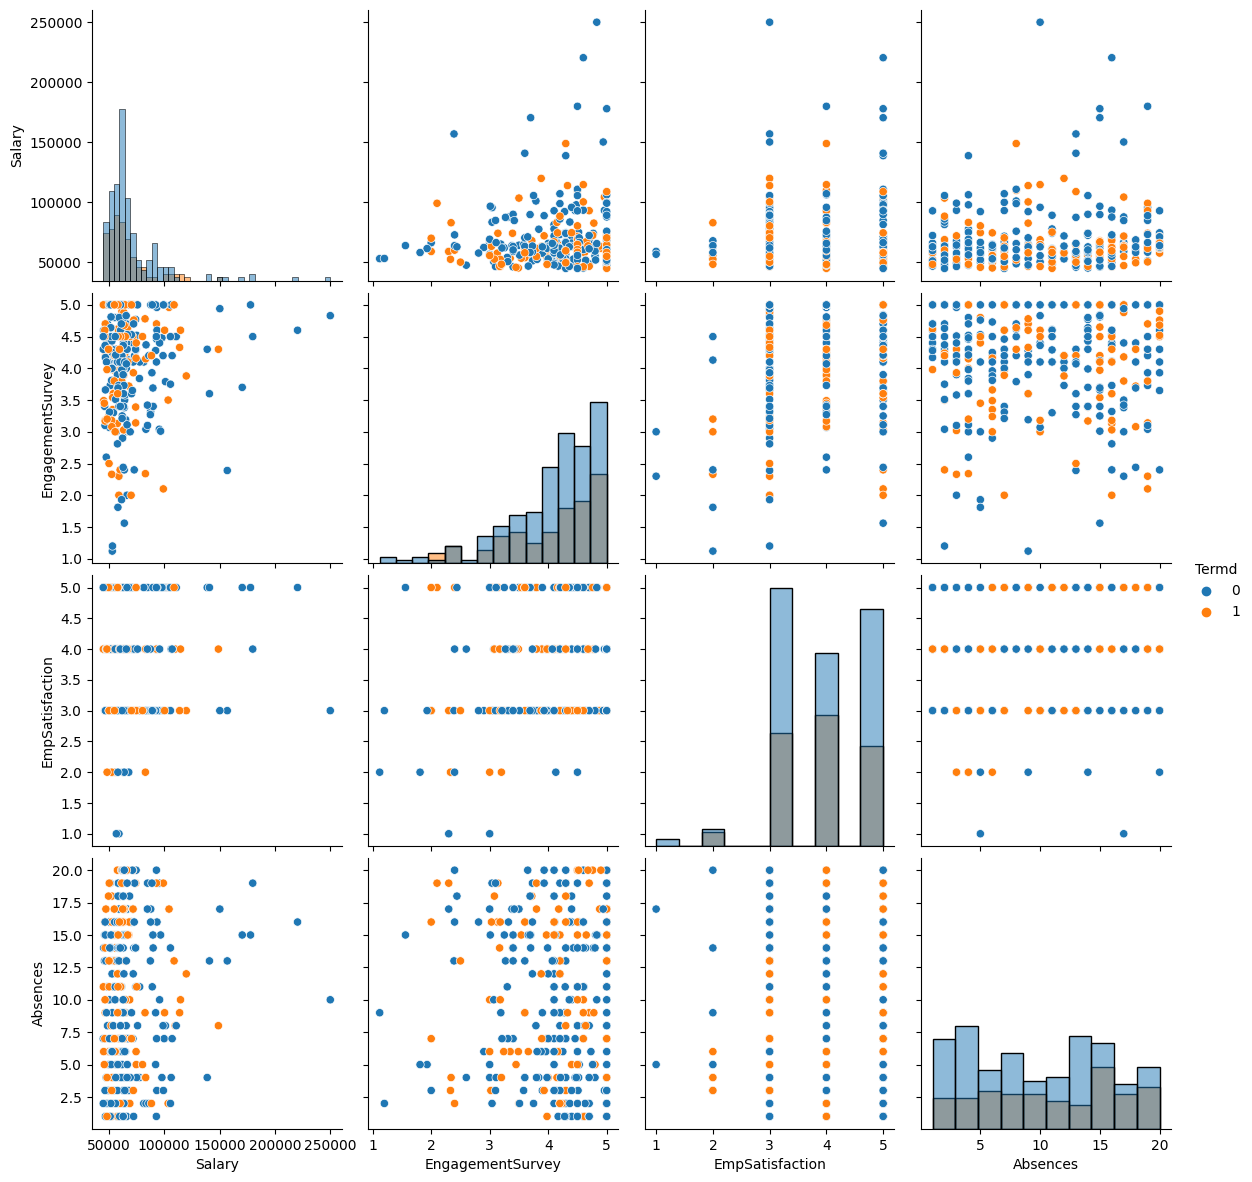

In [ ]:
#codde here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [ ]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)

data['DOB_Date'] = pd.to_datetime(data['DOB'])
data['Age'] = 2022 - data['DOB_Date'].dt.year
data[['DOB', 'DOB_Date', 'Age']]

,DOB,DOB_Date,Age
0,07/10/83,1983-07-10,39
1,05/05/75,1975-05-05,47
2,09/19/88,1988-09-19,34
3,09/27/88,1988-09-27,34
4,09/08/89,1989-09-08,33
...,...,...,...
306,05/11/85,1985-05-11,37
307,05/04/82,1982-05-04,40
308,08/30/79,1979-08-30,43
309,02/24/79,1979-02-24,43


In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data["Salary_minmax"] = scaler.fit_transform(data[["Salary"]])
data[['Salary', 'Salary_minmax']]

,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [ ]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point

print(data.dtypes) #tipe data awal

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                            object
DateofTerm

In [ ]:
#Setelah diubah menjadi category

for col in data.select_dtypes(include="object"):
  data[col] = data[col].astype("category")

print(data.dtypes)

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le = LabelEncoder()

# Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
data["RecruitmentSource"] = le.fit_transform(data["RecruitmentSource"])

# Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
data["PerformanceScore"] = le.fit_transform(data["PerformanceScore"])

print(data.dtypes)
data

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DOB_Date,Age,Salary_minmax
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,5,0,4.60,5,0,1/17/2019,0,1,1983-07-10,39,0.085190
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,4,1,4.96,3,6,2/24/2016,0,17,1975-05-05,47,0.289777
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,5,1,3.02,3,0,5/15/2012,0,3,1988-09-19,34,0.097139
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,4,1,4.84,5,0,1/3/2019,0,15,1988-09-27,34,0.097315
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,3,1,5.00,4,0,2/1/2016,0,2,1989-09-08,33,0.028197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,5,1,4.07,4,0,2/28/2019,0,13,1985-05-11,37,0.101716
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,3,3,3.20,2,0,9/2/2015,5,4,1982-05-04,40,0.016916
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,2,0,4.60,5,6,2/21/2019,0,16,1979-08-30,43,0.855821
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,2,1,5.00,3,5,2/1/2019,0,11,1979-02-24,43,0.215883


In [ ]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

# Dependent Variable (target)
X = data.drop(columns=['Termd'])
y = data['Termd']

# Independent Variable (features)
dt = ['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'PositionID', 'Age',
      'RecruitmentSource', 'PerformanceScore', 'Salary_minmax', 'Absences', 'SpecialProjectsCount',
      'EmpSatisfaction', 'EngagementSurvey']

X = X[dt]  # Memisahkan independent variable
X.head()

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,39,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,47,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,34,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,34,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,33,3,1,0.028197,2,0,4,5.00


In [ ]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)

import pandas as pd
from sklearn.model_selection import train_test_split

# Memisahkan variabel dependen (target) dan independen (fitur)
target_column = 'Termd'
y = data[target_column]
X = data.drop(columns=[target_column])

# Bagi data menjadi data pelatihan dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data train dan data test
print(f"Ukuran data train: {X_train.shape}")
print(f"Ukuran data test: {X_test.shape}")

Ukuran data train: (248, 38)
Ukuran data test: (63, 38)


In [ ]:
# 18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


categorical_columns = ['Position', 'State', 'RecruitmentSource', 'PerformanceScore']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")

Accuracy: 69.84%
Precision: 63.64%
Recall: 31.82%


# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

(Jawaban dibawah)

**19. Is there any relationship between who a person works for (their manager) and their performance score? (5 points)**

Yes, the provided code below performs a basic analysis to explore if there is a relationship between who a person works for (their manager) and their performance score. Here's what the analysis suggests:

1. Visualization:The code generates a bar chart that shows the mean performance score for each manager. Each manager's name is displayed on the x-axis, and the mean performance score is on the y-axis.

2. Observation: By observing the bar chart, you can identify differences in mean performance scores among different managers. If the heights of the bars (mean performance scores) vary significantly among managers, it suggests that there might be a relationship between the manager and the performance scores of the employees they supervise.

3. Initial Findings: Based on the visualization, if you see substantial variations in performance scores among managers, it indicates that there may be a relationship. Managers with higher mean performance scores may be more effective in managing their teams, while managers with lower scores may face challenges in team performance.

In summary, the provided code and visualization serve as an initial exploration of the relationship between managers and performance scores, but further statistical analysis and consideration of additional variables are required for a more comprehensive understanding of this relationship.

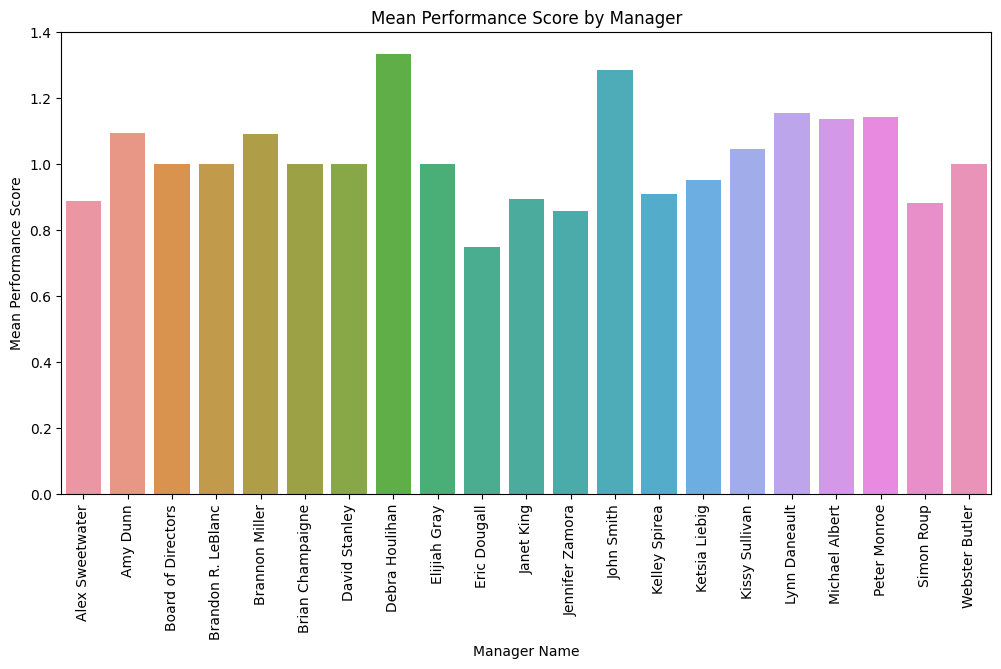

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by ManagerName and calculate mean performance scores
manager_performance = data.groupby('ManagerName')['PerformanceScore'].mean().reset_index()

# Create a bar chart to visualize the mean performance scores by manager
plt.figure(figsize=(12, 6))
sns.barplot(x='ManagerName', y='PerformanceScore', data=manager_performance)
plt.xticks(rotation=90)
plt.xlabel('Manager Name')
plt.ylabel('Mean Performance Score')
plt.title('Mean Performance Score by Manager')
plt.show()

19. Lanjutan (penjelasan)

To determine if there is a relationship between a person's manager (ManagerName) and their performance score (PerformanceScore), we can perform a statistical analysis or create visualizations based on the provided data. Here's how you can approach this analysis:

Group Data by Manager: Group the data by the "ManagerName" column.

Analyze Performance Scores: Calculate summary statistics for performance scores (e.g., mean, median, or distribution) for each manager.

Visualize the Data: Create visualizations to explore the distribution of performance scores among different managers. Box plots, bar charts, or violin plots can be helpful.

So, based on the information and analysis provided, we can conclude that there is a relationship between who a person works for (their manager) and their performance score. This conclusion is based on the analysis of mean performance scores by different managers, which shows variations in performance scores among different managers.

**20. What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)**

Based on the provided data below, here's the analysis of the best recruiting sources for ensuring a low ratio of termination, sorted in ascending order of termination ratios:

Website (Termination Ratio: 7.69%): This source has the lowest termination ratio, indicating that employees recruited through the company's website have a lower likelihood of termination.

Employee Referral (Termination Ratio: 16.13%): Employee referrals also show a relatively low termination ratio, suggesting that candidates referred by current employees tend to stay longer.

LinkedIn (Termination Ratio: 23.68%): LinkedIn is another source with a relatively low termination ratio, indicating that candidates sourced through LinkedIn have a lower likelihood of termination compared to some other sources.

Indeed (Termination Ratio: 24.14%): Candidates from Indeed have a termination ratio slightly higher than LinkedIn but still relatively low compared to other sources.

CareerBuilder (Termination Ratio: 47.83%): While CareerBuilder has a higher termination ratio compared to the top four sources, it is still lower than the remaining sources.

Other (Termination Ratio: 50.00%): The "Other" category has a termination ratio of 50%, which is relatively higher than the top five sources.

Diversity Job Fair (Termination Ratio: 55.17%): Diversity job fairs have a higher termination ratio compared to the top sources, indicating a slightly higher likelihood of termination for candidates recruited through such events.

Google Search (Termination Ratio: 61.22%): Google Search has a higher termination ratio compared to most other sources, indicating a relatively higher likelihood of termination.

On-line Web application (Termination Ratio: 100%): This source has the highest termination ratio, suggesting that candidates from online web applications have the highest likelihood of termination.

Based on this analysis, if you want to ensure a low ratio of termination, you should consider prioritizing recruitment through the company's website, employee referrals, LinkedIn, and Indeed as these sources have the lowest termination ratios. But, it's important to remember that termination rates can be influenced by a range of other factors. Therefore, it is recommended to take a comprehensive approach to recruitment and retention strategies.

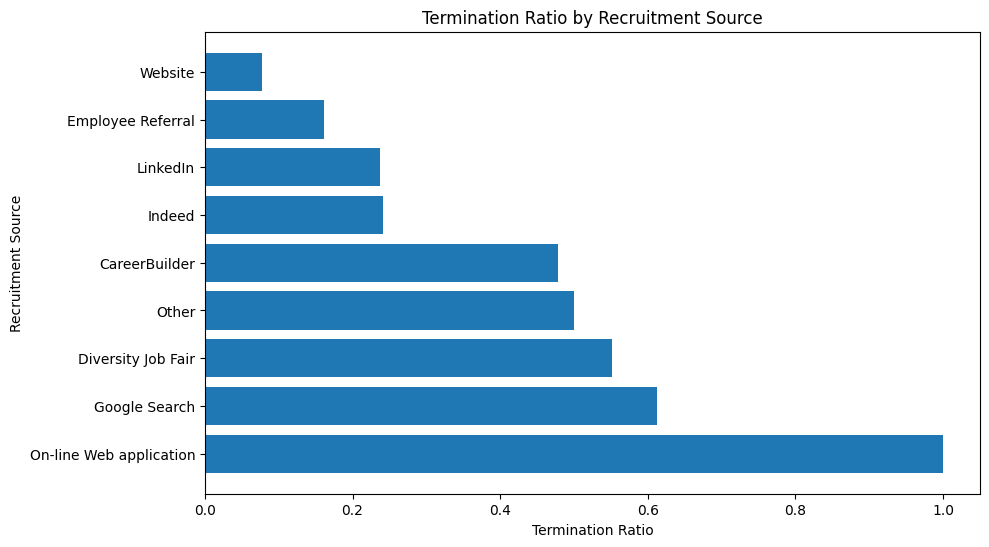

         RecruitmentSource     Termd
8                  Website  0.076923
2        Employee Referral  0.161290
5                 LinkedIn  0.236842
4                   Indeed  0.241379
0            CareerBuilder  0.478261
7                    Other  0.500000
1       Diversity Job Fair  0.551724
3            Google Search  0.612245
6  On-line Web application  1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the URL
url = 'https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv'
data = pd.read_csv(url)

# Calculate termination ratios for each recruitment source
termination_ratios = data.groupby('RecruitmentSource')['Termd'].mean().reset_index()

# Sort recruitment sources by termination ratio in ascending order
termination_ratios_sorted = termination_ratios.sort_values(by='Termd', ascending=True)

# Visualize the results (optional)
plt.figure(figsize=(10, 6))
plt.barh(termination_ratios_sorted['RecruitmentSource'], termination_ratios_sorted['Termd'])
plt.xlabel('Termination Ratio')
plt.ylabel('Recruitment Source')
plt.title('Termination Ratio by Recruitment Source')
plt.gca().invert_yaxis()
plt.show()

# Print the sorted termination ratios
print(termination_ratios_sorted)